# Example of investigating a single round

This notebook shows an example usage if only a single round is to be registered.

## Imports

In [9]:
from situr.image import SituImage
from situr.registration import PeakFinderDifferenceOfGaussian
from situr.registration import IcpRegistrationFunction, SituImageChannelRegistration
from matplotlib import pyplot as plt

## Creating the image

In [10]:
situ_img = SituImage([['./artificial_img/round_0/channel_0.tif'], ['./artificial_img/round_0/channel_1.tif']])

## Creating a peak finder 

Here we create a peak finder and display the shape of the number of found peaks.

In [11]:
peak_finder = PeakFinderDifferenceOfGaussian(threshold=0.01)
peaks = peak_finder.get_channel_peaks(situ_img, 0)
peaks

array([[ 355.,  896.],
       [ 398., 1490.],
       [ 818., 1061.],
       [1481.,  872.],
       [1442.,  341.],
       [ 965.,  338.],
       [ 318.,  305.],
       [1419., 1644.]])

## Visualising the found peaks

The found peaks (in channel 1) are visualised now (note: this step does not require the run of get_channel_peaks). This is done to ensure that the results of the found peak match what we expect. If it does not we can use another peak finder or we can tune the parameters until the result is satisfactory.

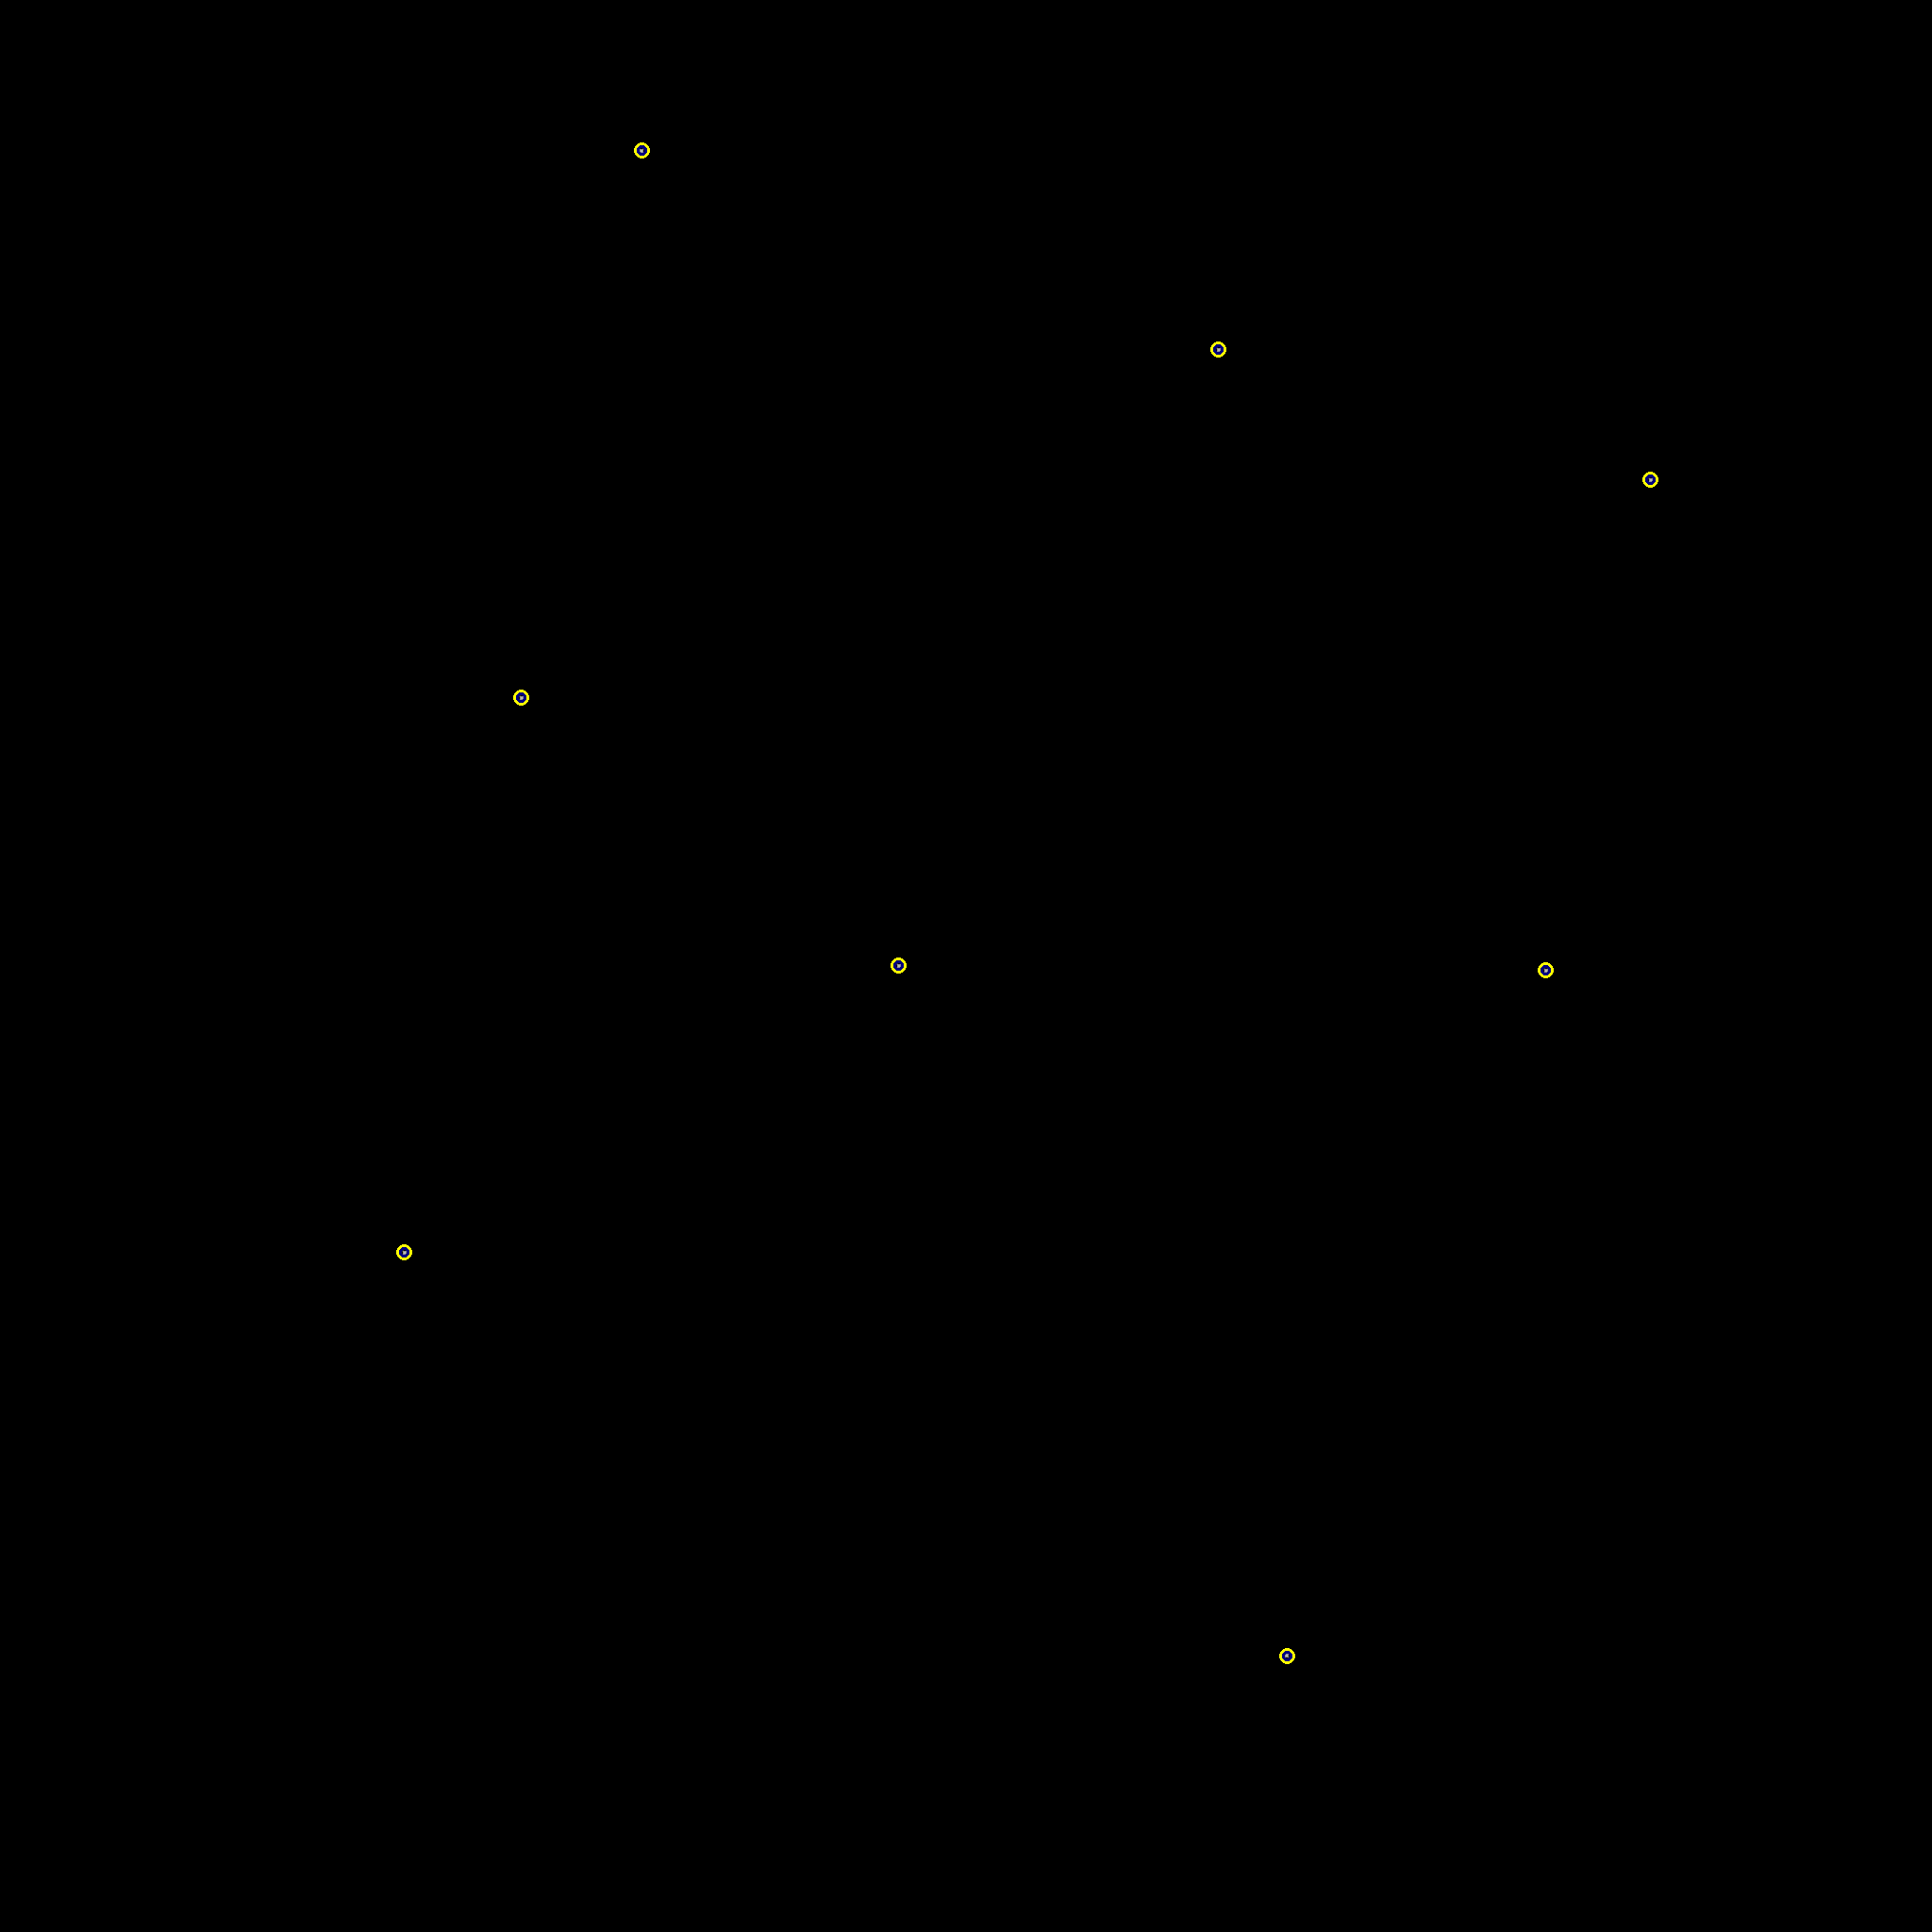

In [12]:
peak_finder.show_channel_peaks(situ_img, 1, img_show=False)

## Performing the registration

We perform the SituImageChannelRegistration with the FilterregRegistration functio and our initialized peak finder.
The transformations have to be applied manually after as the registration we are using does not do this automatically.

In [13]:
registration = SituImageChannelRegistration(IcpRegistrationFunction(300), peak_finder=peak_finder)
registration.do_channel_registration(situ_img)
situ_img.apply_transformations()

### Visualizing the result

We visualize the result by showing both images after each other. (Another approach not here implemented is to display both images on top of each other in different colours).

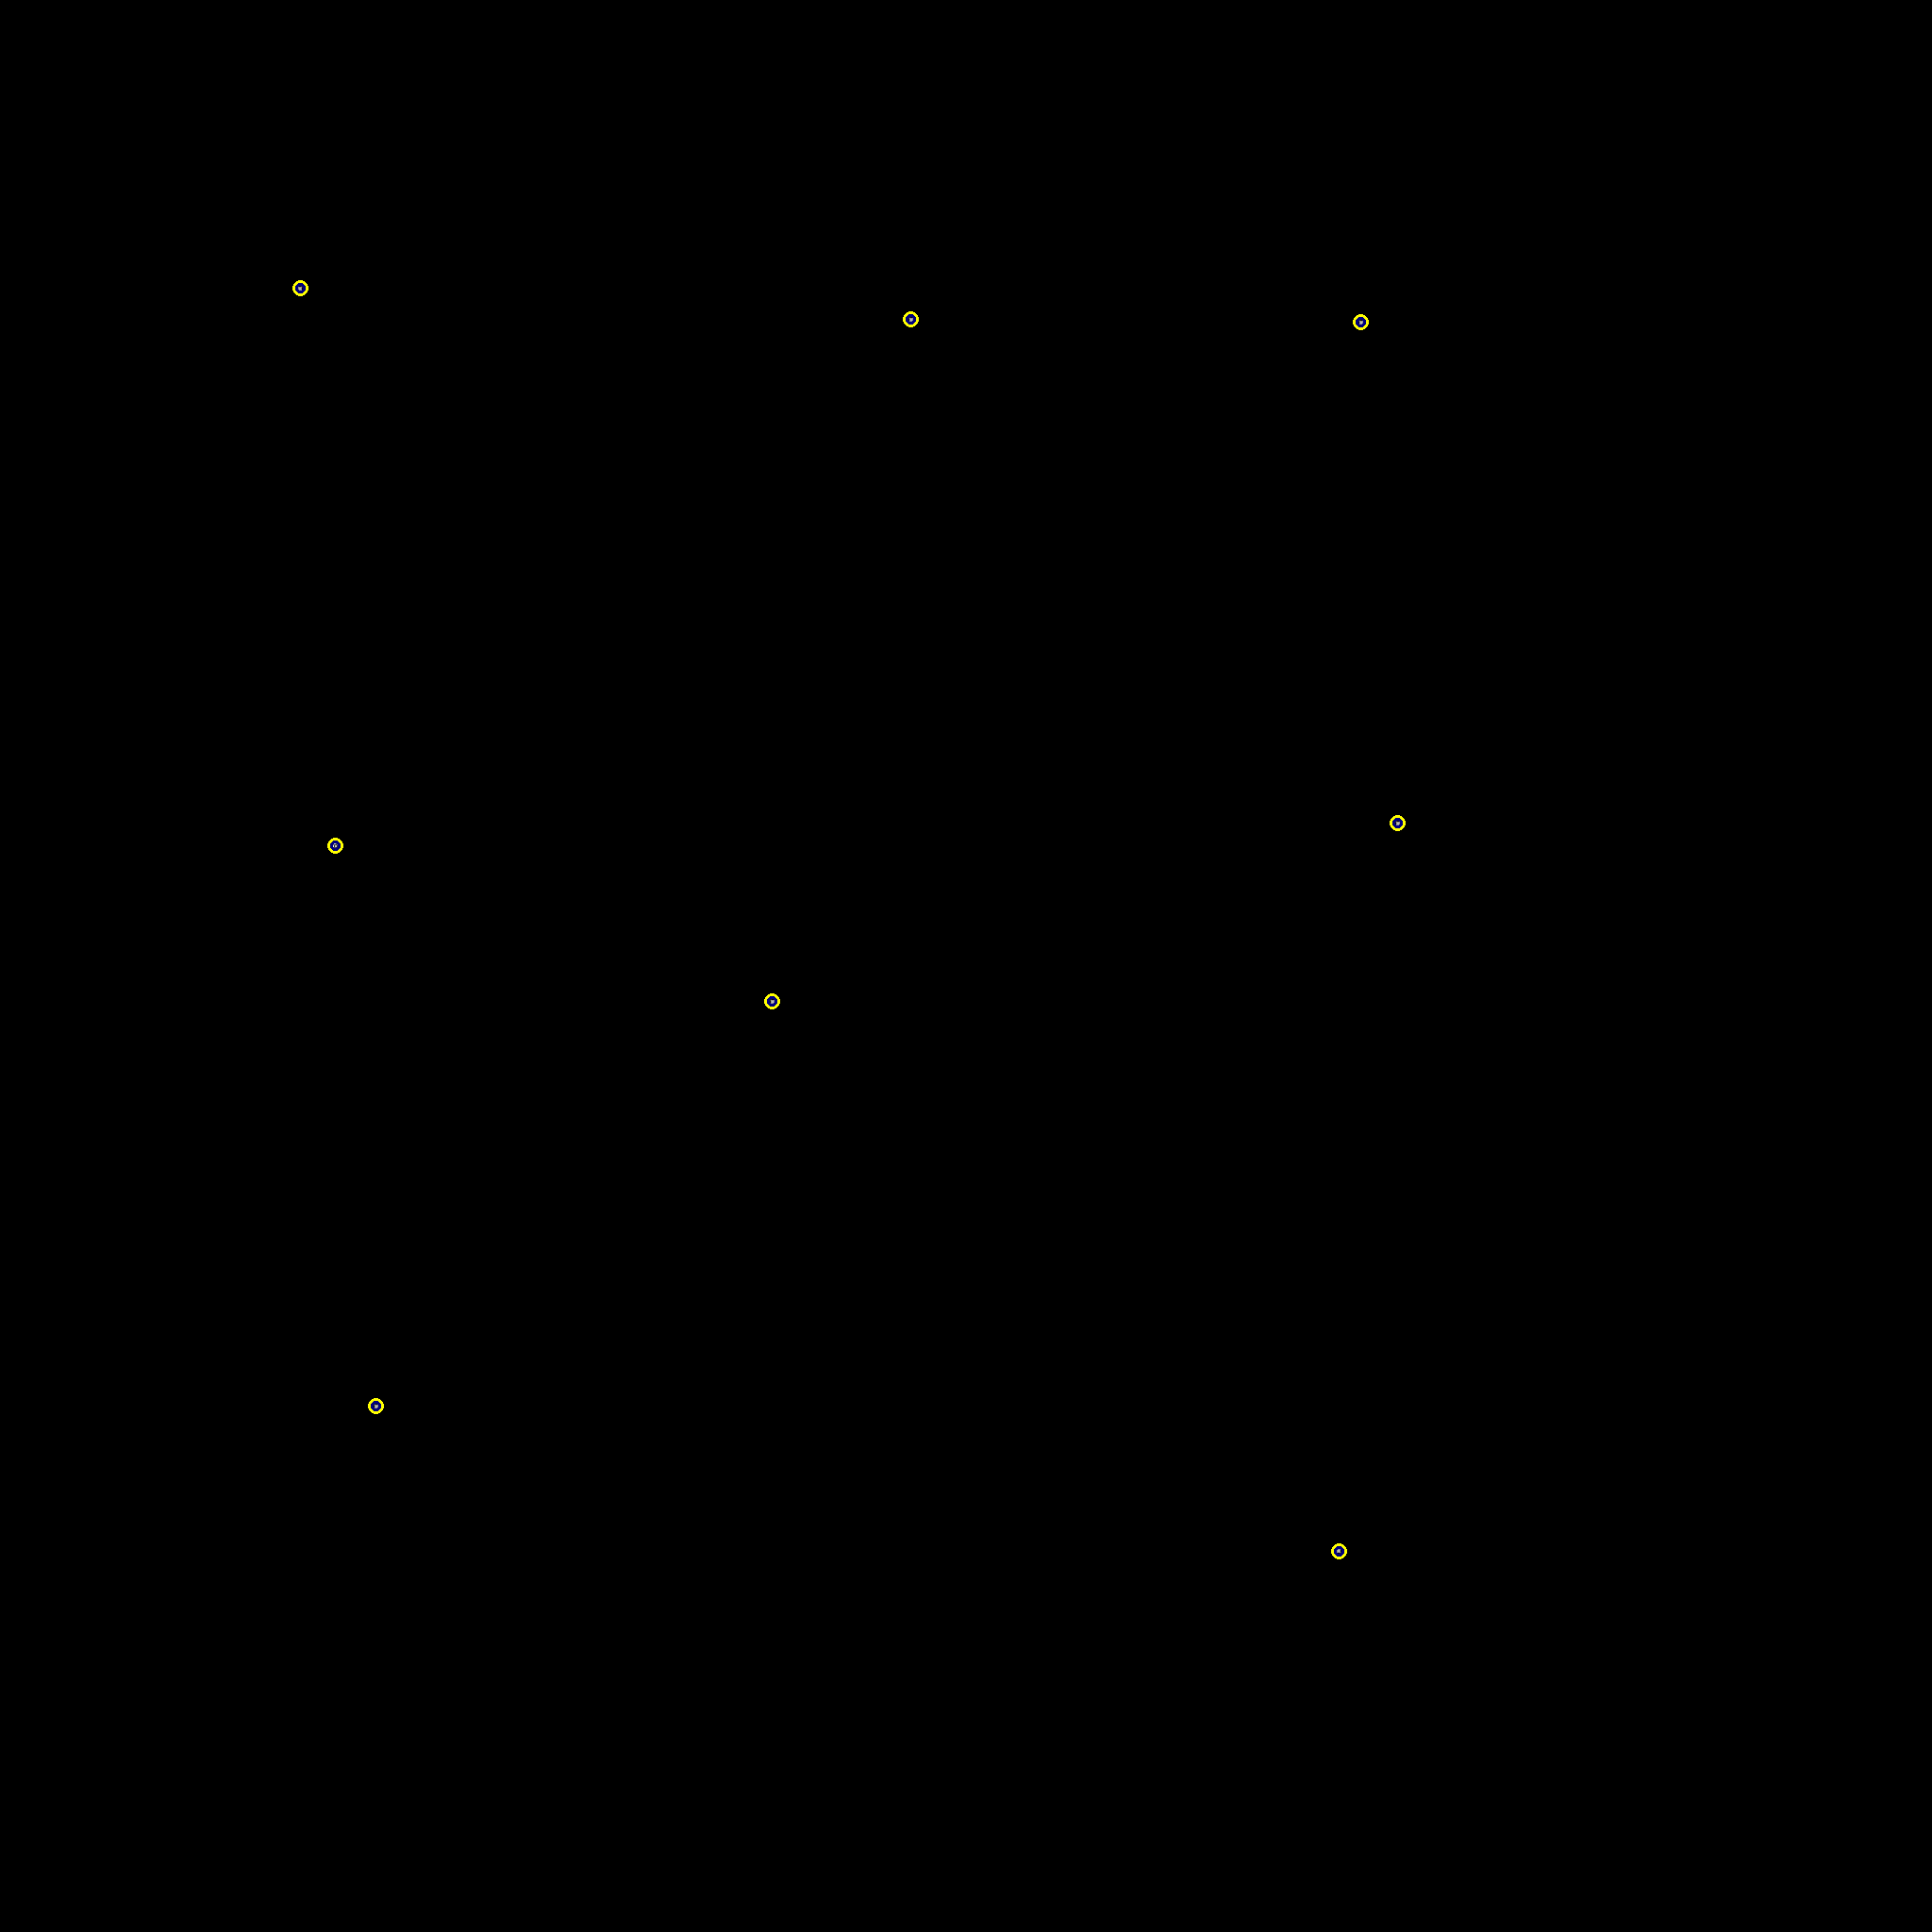

In [14]:
peak_finder.show_channel_peaks(situ_img, 0, img_show=False)

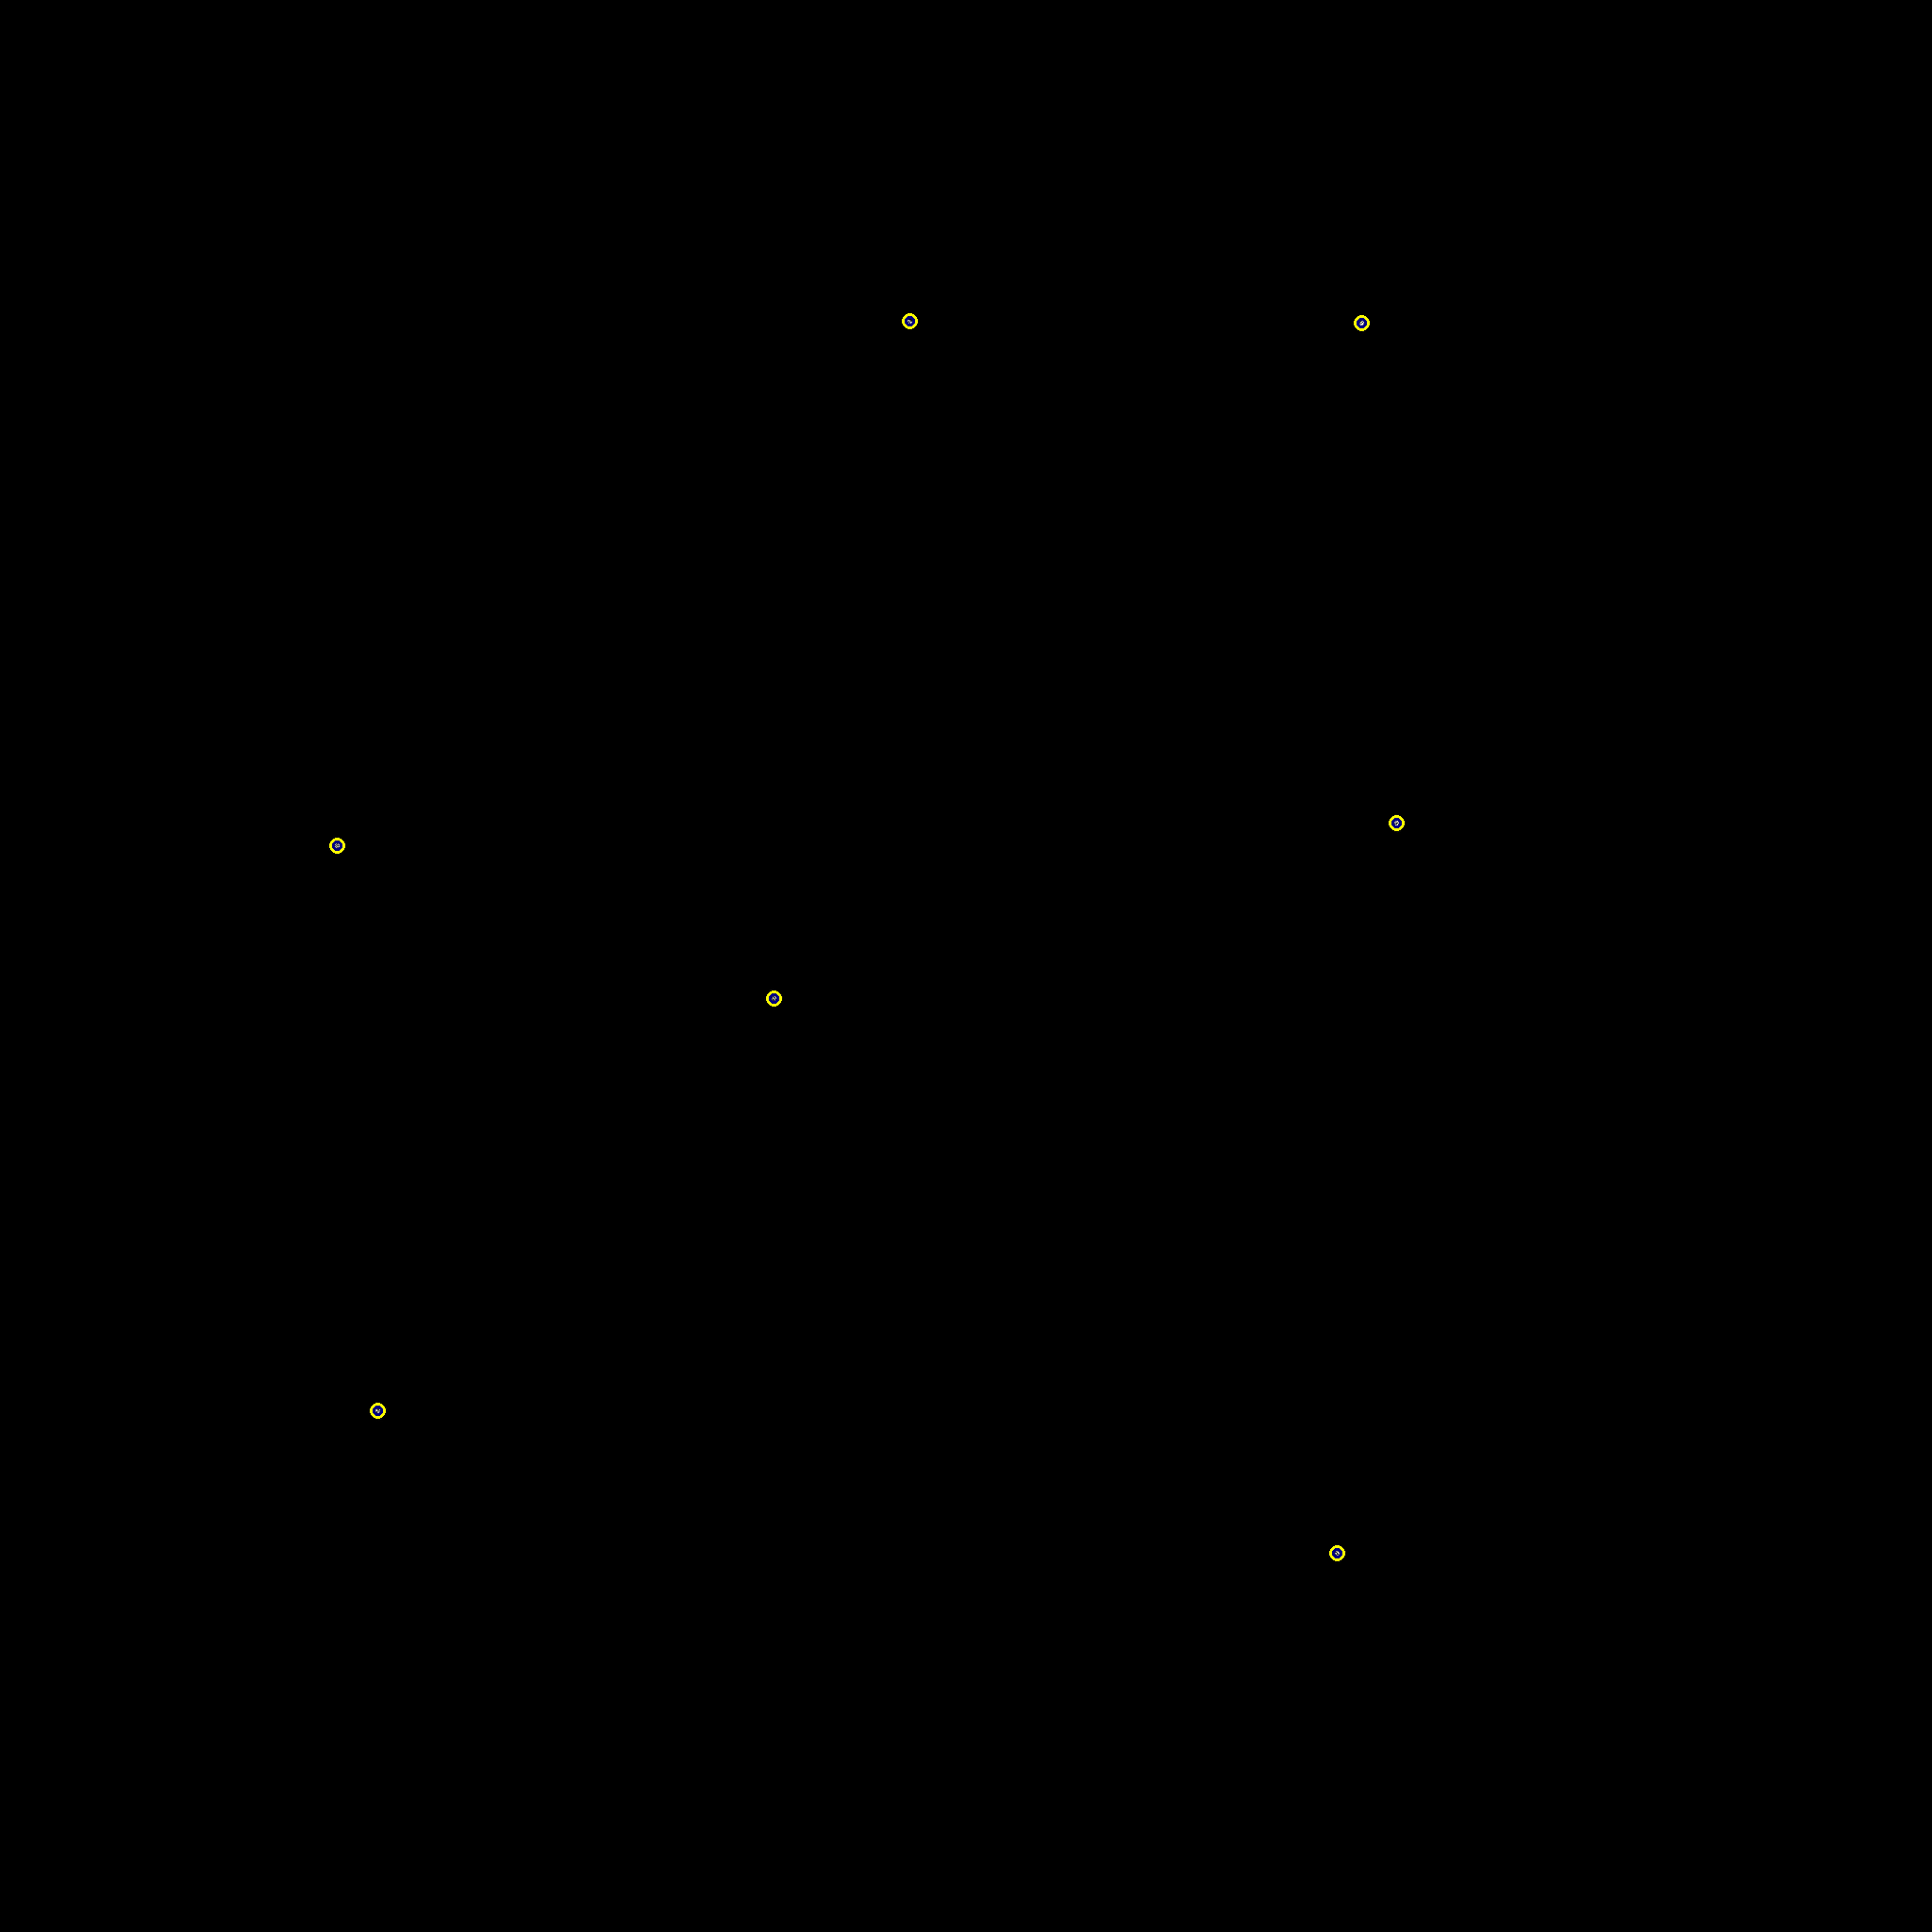

In [15]:
peak_finder.show_channel_peaks(situ_img, 1, img_show=False)

Alternatively we can use scatterplots that we overlay to visualize how well the registration works.

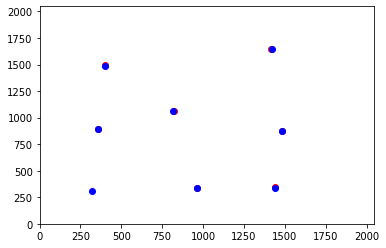

In [16]:
peak_finder.scatterplot_channel_peaks(situ_img, 1, color='r')
peak_finder.scatterplot_channel_peaks(situ_img, 0, color='b')
plt.show()

### Printing the transformation

The following code prints the transformation. This varies depending on the transformations.

In [17]:
print(situ_img.channel_transformations[1].offset)
print(situ_img.channel_transformations[1].scale)
print(situ_img.channel_transformations[1].transform_matrix)

[ 338.51832567 -379.28188437]
1
[[ 0.96079843  0.27724786]
 [-0.27724786  0.96079843]]
